<a href="https://colab.research.google.com/github/kaii55/DMAT_2018_ARITRA_MAJUMDAR/blob/master/DMAT_2018_ARITRA_MAJUMDAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

#Importing libraries for data splitting and sampling
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE 

#Importing libraries for Artificial Neural Network
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping 
from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor

#Importing libraries for model evaluation 
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#Other libraries
import eli5
from eli5.sklearn import PermutationImportance


#Reading the data
df = pd.read_csv('creditcard.csv')

#Printing the first five rows of the data
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [2]:
#Checking the data types of the columns (Features)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [3]:
#Checking for missing values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [4]:
#Description of the dataset
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
#Description of the fraudulent cases
df[df['Class']==1].describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.0
mean,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,-5.676883,3.800173,-6.259393,-0.109334,-6.971723,-0.092929,-4.139946,-6.665836,-2.246308,0.680659,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321,1.0
std,47835.365138,6.783687,4.291216,7.110937,2.873318,5.372468,1.858124,7.206773,6.797831,2.500896,4.897341,2.678605,4.654458,1.104518,4.278940,1.049915,3.865035,6.970618,2.899366,1.539853,1.346635,3.869304,1.494602,1.579642,0.515577,0.797205,0.471679,1.376766,0.547291,256.683288,0.0
min,406.000000,-30.552380,-8.402154,-31.103685,-1.313275,-22.105532,-6.406267,-43.557242,-41.044261,-13.434066,-24.588262,-1.702228,-18.683715,-3.127795,-19.214325,-4.498945,-14.129855,-25.162799,-9.498746,-3.681904,-4.128186,-22.797604,-8.887017,-19.254328,-2.028024,-4.781606,-1.152671,-7.263482,-1.869290,0.000000,1.0
25%,41241.500000,-6.036063,1.188226,-8.643489,2.373050,-4.792835,-2.501511,-7.965295,-0.195336,-3.872383,-7.756698,1.973397,-8.688177,-0.979117,-9.692723,-0.643539,-6.562915,-11.945057,-4.664576,-0.299423,-0.171760,0.041787,-0.533764,-0.342175,-0.436809,-0.314348,-0.259416,-0.020025,-0.108868,1.000000,1.0
50%,75568.500000,-2.342497,2.717869,-5.075257,4.177147,-1.522962,-1.424616,-3.034402,0.621508,-2.208768,-4.578825,3.586218,-5.502530,-0.065566,-6.729720,-0.057227,-3.549795,-5.302949,-1.664346,0.646807,0.284693,0.592146,0.048434,-0.073135,-0.060795,0.088371,0.004321,0.394926,0.146344,9.250000,1.0
75%,128483.000000,-0.419200,4.971257,-2.276185,6.348729,0.214562,-0.413216,-0.945954,1.764879,-0.787850,-2.614184,5.307078,-2.974088,0.672964,-4.282821,0.609189,-1.226043,-1.341940,0.091772,1.649318,0.822445,1.244611,0.617474,0.308378,0.285328,0.456515,0.396733,0.826029,0.381152,105.890000,1.0
max,170348.000000,2.132386,22.057729,2.250210,12.114672,11.095089,6.474115,5.802537,20.007208,3.353525,4.031435,12.018913,1.375941,2.815440,3.442422,2.471358,3.139656,6.739384,3.790316,5.228342,11.059004,27.202839,8.361985,5.466230,1.091435,2.208209,2.745261,3.052358,1.779364,2125.870000,1.0


In [6]:
#Description of the non-fraudulen cases
df[df['Class'] == 0].describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.0
mean,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,0.009824,-0.006576,0.010832,0.000189,0.012064,0.000161,0.007164,0.011535,0.003887,-0.001178,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022,0.0
std,47484.015786,1.929814,1.636146,1.459429,1.399333,1.356952,1.329913,1.178812,1.161283,1.089372,1.044204,1.003112,0.945939,0.995067,0.897007,0.915060,0.844772,0.749457,0.824919,0.811733,0.769404,0.716743,0.723668,0.621541,0.605776,0.520673,0.482241,0.399847,0.329570,250.105092,0.0
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-31.764946,-73.216718,-6.290730,-14.741096,-4.797473,-15.144988,-5.791881,-18.392091,-4.391307,-10.115560,-17.098444,-5.366660,-7.213527,-54.497720,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.0
25%,54230.000000,-0.917544,-0.599473,-0.884541,-0.850077,-0.689398,-0.766847,-0.551442,-0.208633,-0.640412,-0.532880,-0.763447,-0.402102,-0.648067,-0.422453,-0.582812,-0.465543,-0.482644,-0.497414,-0.456366,-0.211764,-0.228509,-0.542403,-0.161702,-0.354425,-0.317145,-0.327074,-0.070852,-0.052950,5.650000,0.0
50%,84711.000000,0.020023,0.064070,0.182158,-0.022405,-0.053457,-0.273123,0.041138,0.022041,-0.049964,-0.091872,-0.034923,0.141679,-0.013547,0.051947,0.048294,0.067377,-0.064833,-0.002787,0.003117,-0.062646,-0.029821,0.006736,-0.011147,0.041082,0.016417,-0.052227,0.001230,0.011199,22.000000,0.0
75%,139333.000000,1.316218,0.800446,1.028372,0.737624,0.612181,0.399619,0.571019,0.326200,0.598230,0.455135,0.736362,0.619207,0.662492,0.494104,0.648842,0.523738,0.399922,0.501103,0.457499,0.132401,0.185626,0.528407,0.147522,0.439869,0.350594,0.240671,0.090573,0.077962,77.050000,0.0
max,172792.000000,2.454930,18.902453,9.382558,16.875344,34.801666,73.301626,120.589494,18.709255,15.594995,23.745136,10.002190,7.848392,7.126883,10.526766,8.877742,17.315112,9.253526,5.041069,5.591971,39.420904,22.614889,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,0.0


In [7]:
#Variance check before amount scaling
print(df.var())

Time      2.255124e+09
V1        3.836489e+00
V2        2.726820e+00
V3        2.299029e+00
V4        2.004684e+00
V5        1.905081e+00
V6        1.774946e+00
V7        1.530401e+00
V8        1.426479e+00
V9        1.206992e+00
V10       1.185594e+00
V11       1.041855e+00
V12       9.984034e-01
V13       9.905708e-01
V14       9.189055e-01
V15       8.378034e-01
V16       7.678191e-01
V17       7.213734e-01
V18       7.025394e-01
V19       6.626619e-01
V20       5.943254e-01
V21       5.395255e-01
V22       5.266428e-01
V23       3.899507e-01
V24       3.668084e-01
V25       2.717308e-01
V26       2.325429e-01
V27       1.629192e-01
V28       1.089550e-01
Amount    6.256007e+04
Class     1.724507e-03
dtype: float64


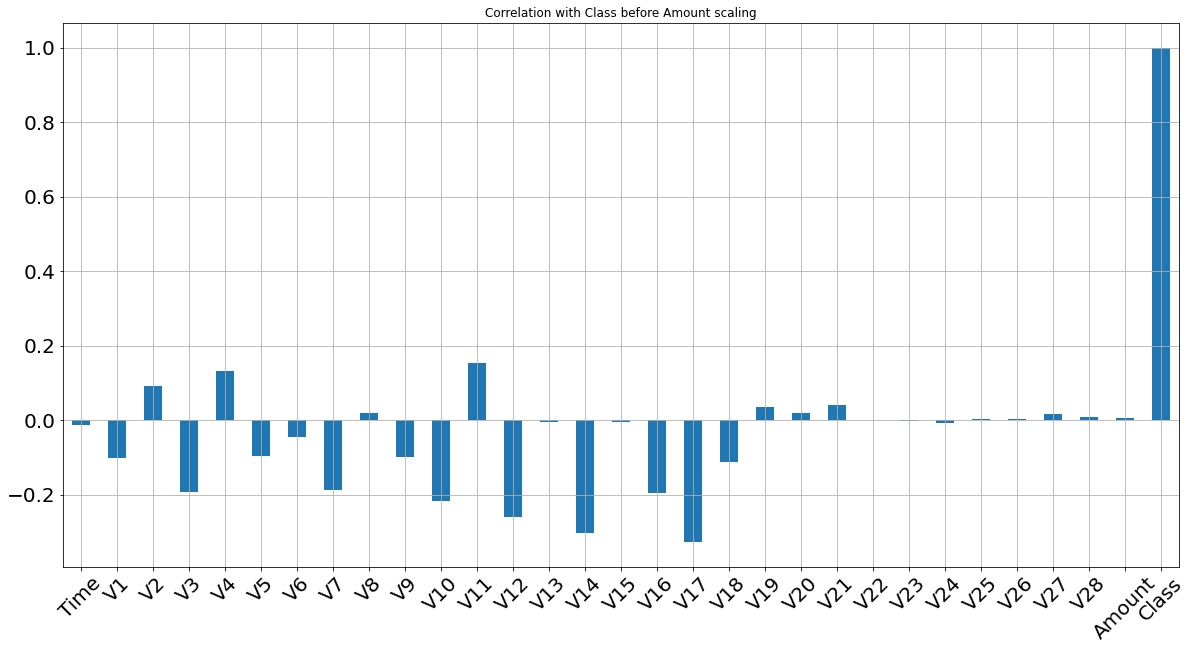

In [8]:
#Correlation checking among the features and target value (Class) before amount scaling
df.corrwith(df.Class).plot.bar(
        figsize = (20, 10), title = 'Correlation with Class before Amount scaling', fontsize = 20,
        rot = 45, grid = True)

In [10]:
#Checking the distribution of the class
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [11]:
# Count the occurrences of fraud and no fraud and print them
occ = df['Class'].value_counts()
print(occ)

# Print the ratio of fraud cases
print(occ / len(df))

0    284315
1       492
Name: Class, dtype: int64
0    0.998273
1    0.001727
Name: Class, dtype: float64


In [12]:
#Amount scaling
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
df['Amount'] = ss.fit_transform(df['Amount'].values.reshape(-1,1))
df.drop(['Time'], axis=1, inplace=True)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


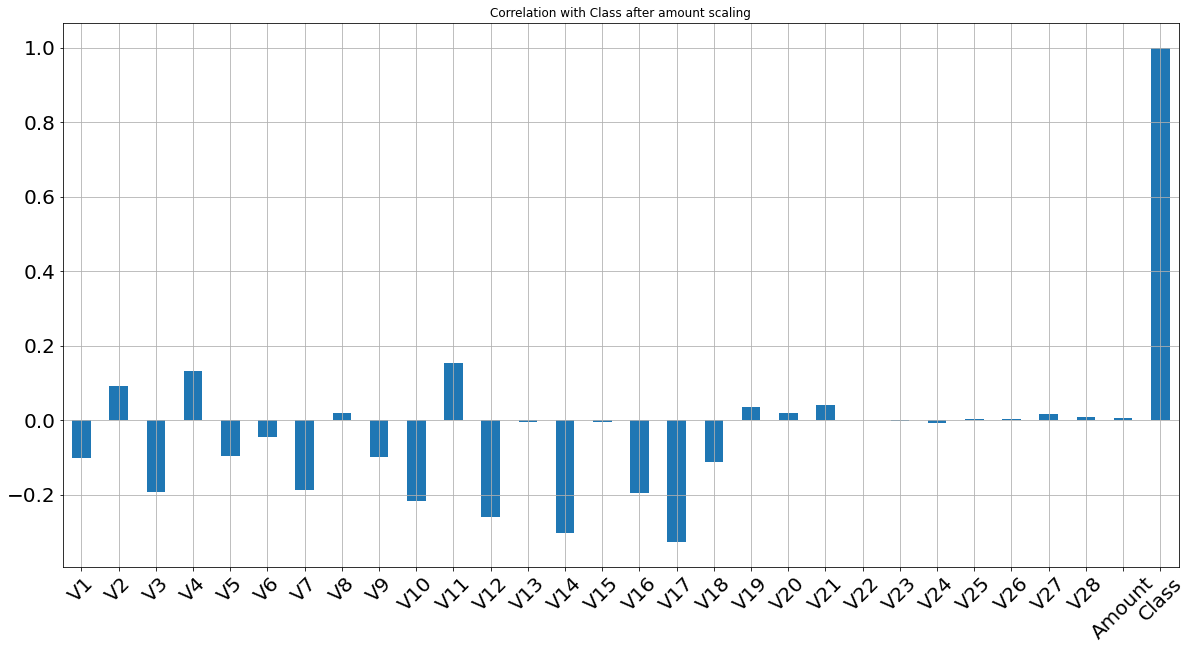

In [13]:
#Correlation checking among the features and target value (Class) after amount scaling
df.corrwith(df.Class).plot.bar(
        figsize = (20, 10), title = "Correlation with Class after amount scaling", fontsize = 20,
        rot = 45, grid = True)

In [14]:
#Variance check after amount scaling
print(df.var())

V1        3.836489
V2        2.726820
V3        2.299029
V4        2.004684
V5        1.905081
V6        1.774946
V7        1.530401
V8        1.426479
V9        1.206992
V10       1.185594
V11       1.041855
V12       0.998403
V13       0.990571
V14       0.918906
V15       0.837803
V16       0.767819
V17       0.721373
V18       0.702539
V19       0.662662
V20       0.594325
V21       0.539526
V22       0.526643
V23       0.389951
V24       0.366808
V25       0.271731
V26       0.232543
V27       0.162919
V28       0.108955
Amount    1.000004
Class     0.001725
dtype: float64


In [15]:
X = df.loc[:, df.columns != 'Class' ]
Y = df.loc[:, df.columns == 'Class' ]

#Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, 
                                                    stratify = Y)

X_train_train, X_test_test, Y_train_train, Y_test_test = train_test_split(X_train, Y_train, test_size = 0.20)

sm = SMOTE(random_state=42, kind = 'borderline1')

X_resampled, Y_resampled = sm.fit_resample(X_train_train, Y_train_train)

In [15]:
# Code to determine layers, batch size, activation and epochs
# def create_model(layers, activation):
#     model = Sequential()
#     for i, nodes in enumerate(layers):
#         if i == 0:
#             model.add(Dense(nodes, input_dim = len(X.columns)))
#             model.add(Activation(activation))
#         else:
#             model.add(Dense(nodes))
#             model.add(Activation(activation))
#     model.add(Dense(1))
    
#     model.compile(optimizer = 'adam', loss='binary_crossentropy')
#     return(model)

# model = KerasClassifier(build_fn = create_model, verbose = 1)

# layers = [[29], [30], [35], [40], [45], [50], [60], [65], [70]]
# activations = [keras.activations.sigmoid, keras.activations.relu]
# param_grid = dict(layers = layers, activation = activations, batch_size = [256, 512], epochs = [30])
# grid = GridSearchCV(estimator = model, param_grid = param_grid, scoring= 'f1')

In [16]:
# Code to determine neurons, dropout rate and kernel intializer
# def create_model(neurons=1, dropout_rate=0.0, init_mode='uniform'):
#     model = Sequential()
#     model.add(Dense(neurons, input_dim=len(X.columns), kernel_initializer=init_mode, activation='relu'))
#     model.add(Dropout(dropout_rate))
#     model.add(Dense(1, kernel_initializer=init_mode, activation='sigmoid'))
    
#     model.compile(loss='binary_crossentropy', optimizer='adam')
#     return model
# model = KerasClassifier(build_fn=create_model, epochs=30, batch_size=256, verbose=1)
# neurons = [29, 30, 35, 40, 45, 50, 55, 60, 65, 70]
# dropout_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
# init_mode = ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
# param_grid = dict(neurons = neurons, dropout_rate=dropout_rate, init_mode=init_mode)
# grid = GridSearchCV(estimator=model, param_grid=param_grid,cv=5, scoring = make_scorer(f1_score))
# grid_result = grid.fit(X_resampled, Y_resampled)
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
#     print("%f (%f) with: %r" % (mean, stdev, param))

In [17]:
# Code to determine important features in the dataset
# def base_model():
#     model = Sequential()
#     model.add(Dense(64, input_dim=len(X.columns), activation='relu'))
#     model.add(Dense(1, activation='sigmoid'))
#     model.compile(loss='binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])
#     return model

# my_model = KerasClassifier(build_fn=base_model)    
# my_model.fit(X_resampled,Y_resampled)

# perm = PermutationImportance(my_model, random_state=42).fit(X_resampled,Y_resampled)
# eli5.show_weights(perm, feature_names = X.columns.tolist())

In [18]:
# Code to determine Learning Rate 
# model = Sequential()
# model.add(Dense(64, input_dim=len(X.columns), activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(1, activation='sigmoid'))

# model.compile(loss='binary_crossentropy',
#               optimizer='adam',
#               metrics=['accuracy'])

# from keras_lr_finder import LRFinder
# lr_finder = LRFinder(model)
# lr_finder.find(X_resampled, Y_resampled, .00001, 1, 512, 5)

# lr_finder.plot_loss()
# plt.show()

In [16]:
from sklearn.metrics import f1_score
callbacks = [EarlyStopping(monitor='val_loss',mode='min',patience=2, restore_best_weights = True)]
results_control_accuracy = []
for i in range(0,10):
    model = Sequential()
    model.add(Dense(64, input_dim=len(X.columns),kernel_initializer = 'he_normal', activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(keras.optimizers.Adam(lr=0.001),'binary_crossentropy',metrics=['accuracy'])

    history = model.fit(X_resampled, Y_resampled, callbacks = callbacks,
          epochs=30,validation_data = (X_test_test, Y_test_test),
          batch_size=512, verbose = 0)

    y_test_pred= model.predict(X_test) > 0.5
    
    f1 = f1_score(Y_test, y_test_pred)
    
    results_control_accuracy.append(f1)
    
print(results_control_accuracy)

[0.685483870967742, 0.6590038314176245, 0.7196652719665271, 0.7203389830508473, 0.6719367588932806, 0.6693227091633467, 0.6666666666666665, 0.685483870967742, 0.7172995780590716, 0.7203389830508473]


In [17]:
results_control_accuracy = pd.DataFrame(results_control_accuracy)

In [18]:
mean_control_accuracy = results_control_accuracy.mean()
print("Mean Control Accuracy: {}".format(mean_control_accuracy))

Mean Control Accuracy: 0    0.691554
dtype: float64


In [19]:
std_control_accuracy = results_control_accuracy.std()
print("Standard Deviation of Control Accuracy Results: {}".format(std_control_accuracy))

Standard Deviation of Control Accuracy Results: 0    0.025258
dtype: float64


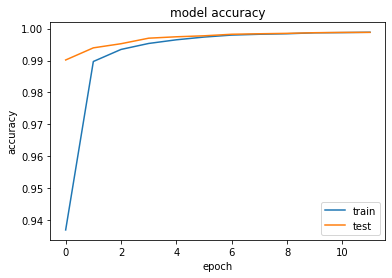

In [21]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

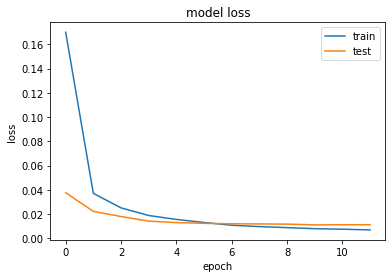

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [23]:
#Confusion Matrix 
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_test_pred)
print(cm)

[[56811    53]
 [   13    85]]


In [24]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.62      0.87      0.72        98

    accuracy                           1.00     56962
   macro avg       0.81      0.93      0.86     56962
weighted avg       1.00      1.00      1.00     56962



In [26]:
print('Train Accuracy: {}\nTest Accuracy:{}'.format(history.history['accuracy'][-1], history.history['val_accuracy'][-1]))

Train Accuracy: 0.9988541603088379
Test Accuracy:0.9988150000572205


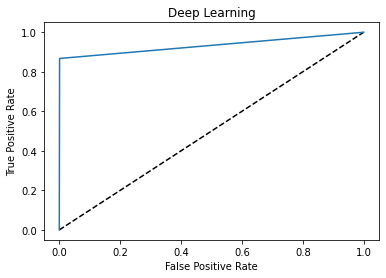

In [27]:
#Roc curve generation
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Y_test, y_test_pred)
plt.plot ([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label = 'Deep Learning')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Deep Learning')
plt.show()

In [ ]:
# Code to determine learning rate 
# model = Sequential()
# model.add(Dense(64, input_dim=len(X.columns), activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(1, activation='sigmoid'))

# model.compile(loss='binary_crossentropy',
#               optimizer='adam',
#               metrics=['accuracy'])

# from keras_lr_finder import LRFinder
# lr_finder = LRFinder(model)
# lr_finder.find(X_resampled, Y_resampled, .00001, 1, 512, 5)

# lr_finder.plot_loss()
# plt.show()

In [28]:
from sklearn.metrics import f1_score
callbacks = [EarlyStopping(monitor='val_loss',mode='min',patience=2, restore_best_weights = True)]
results_experimental_accuracy = []
for i in range(0,10):
    model = Sequential()
    model.add(Dense(64, input_dim=len(X.columns),kernel_initializer = 'he_normal',activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(64, kernel_initializer = 'he_normal', activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(keras.optimizers.Adam(lr=0.001),'binary_crossentropy',metrics=['accuracy'])

    history = model.fit(X_resampled, Y_resampled,callbacks = callbacks,
          epochs=30,validation_data = (X_test_test, Y_test_test),
          batch_size=512, verbose = 0)

    y_test_pred= model.predict(X_test) > 0.5
    
    f1 = f1_score(Y_test, y_test_pred)
    
    results_experimental_accuracy.append(f1)
    
print(results_experimental_accuracy)

[0.8210526315789473, 0.8, 0.8210526315789473, 0.8290155440414508, 0.8200000000000001, 0.8258706467661691, 0.7788461538461539, 0.7849462365591399, 0.84375, 0.7979797979797979]


In [30]:
results_experimental_accuracy = pd.DataFrame(results_experimental_accuracy)

In [31]:
mean_experimental_accuracy = results_experimental_accuracy.mean()
print("Mean Experimental Accuracy: {}".format(mean_experimental_accuracy))

Mean Experimental Accuracy: 0    0.812251
dtype: float64


In [32]:
std_experimental_accuracy = results_experimental_accuracy.std()
print("Standard Deviation of Experimental Accuracy Results: {}".format(std_experimental_accuracy))

Standard Deviation of Experimental Accuracy Results: 0    0.020787
dtype: float64


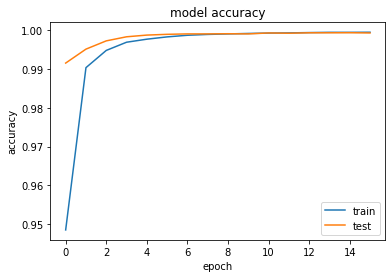

In [33]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

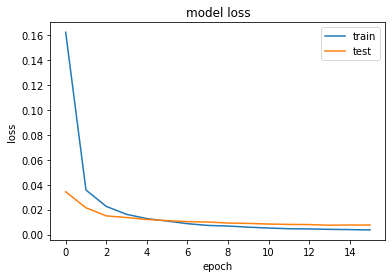

In [34]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [35]:
#Confusion Matrix generation
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_test_pred)
print(cm)

[[56843    21]
 [   19    79]]


In [36]:
#Classification Report
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.79      0.81      0.80        98

    accuracy                           1.00     56962
   macro avg       0.89      0.90      0.90     56962
weighted avg       1.00      1.00      1.00     56962



In [38]:
print('Train Accuracy: {}\nTest Accuracy:{}'.format(history.history['accuracy'][-1], history.history['val_accuracy'][-1]))

Train Accuracy: 0.9994834065437317
Test Accuracy:0.9992977976799011


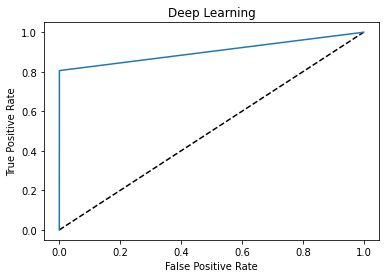

In [39]:
#Roc Curve generation
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Y_test, y_test_pred)
plt.plot ([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label = 'Deep Learning')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Deep Learning')
plt.show()

In [40]:
results_accuracy= pd.concat([results_control_accuracy, results_experimental_accuracy], axis=1)
results_accuracy.columns = ['Control', 'Experimental']

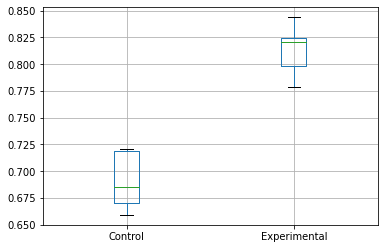

In [41]:
results_accuracy.boxplot()

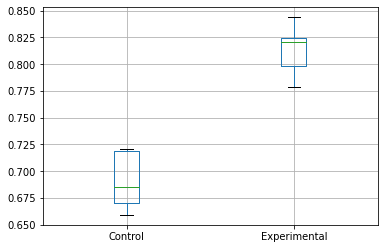

In [42]:
results_accuracy.boxplot(showfliers=False)

(0.9, 1.0)

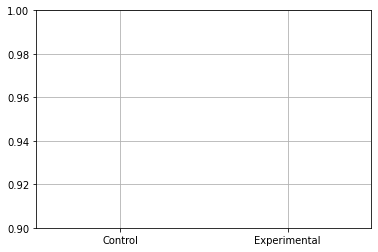

In [43]:
ax = results_accuracy.boxplot()
ax.set_ylim([0.9,1])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fccbed42f98>,
      dtype=object)

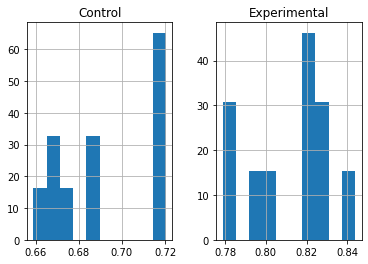

In [44]:
results_accuracy.hist(density=True)

In [45]:
#Normality Testing
from scipy import stats

alpha = 0.05;

s, p = stats.normaltest(results_control_accuracy)
if p < alpha:
  print('Control data is not normal')
else:
  print('Control data is normal')

s, p = stats.normaltest(results_experimental_accuracy)
if p < alpha:
  print('Experimental data is not normal')
else:
  print('Experimental data is normal')

Control data is normal
Experimental data is normal


In [46]:
#Significance Testing
s, p = stats.wilcoxon(results_control_accuracy[0], results_experimental_accuracy[0])

if p < 0.05:
  print('null hypothesis rejected, significant difference between the data-sets')
else:
  print('null hypothesis accepted, no significant difference between the data-sets')

null hypothesis rejected, significant difference between the data-sets
